#  Medical Image Segmentation 

##  "Simple Thresholding Technique" 

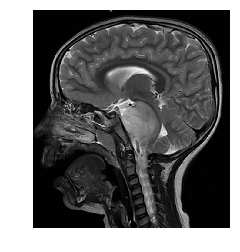

In [1]:
# First import OpenCV, NumPY and MatPlotLib as we will use these libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Load a color image
img = cv2.imread("brainscan.jpg")

#Original Image
plt.axis("off")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Blurring Image To Reduce Noise

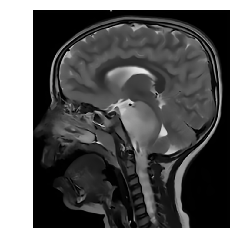

In [2]:
# Apply some blurring to reduce noise

# h is the Parameter regulating filter strength for luminance component. 
# Bigger h value perfectly removes noise but also removes image details, 
# smaller h value preserves details but also preserves some noise
# Experiment with setting h and hColor to a suitable value.

h = 20
hColor = 20 
    
# Default values
templateWindowSize = 7
searchWindowSize = 21
    
blur = cv2.fastNlMeansDenoisingColored(img, None,h,hColor,templateWindowSize,searchWindowSize)
plt.imshow(cv2.cvtColor(blur, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.savefig("blur.jpg")

# Edge Detection




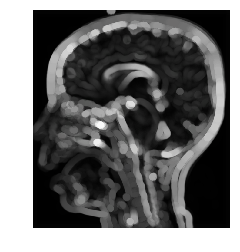

In [3]:
# Apply a morphological gradient (dilate the image, erode the image, and take the difference)

elKernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (23,23))


gradient = cv2.morphologyEx(blur, cv2.MORPH_GRADIENT, elKernel)


plt.imshow(cv2.cvtColor(gradient, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.savefig("edgedetect.jpg")

## OTSU Thresholding


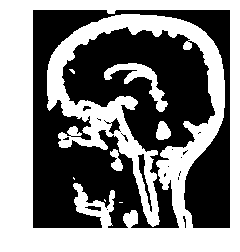

In [4]:
# Apply Otsu's method - or you can adjust the level at which thresholding occurs
# and see what the effect of this is
# Convert gradient to grayscale

gradient = cv2.cvtColor(gradient, cv2.COLOR_BGR2GRAY)

#Apply Otsu's method for thresholding gradient image
otsu = cv2.threshold(gradient, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

plt.imshow(otsu, cmap='gray')
plt.axis("off")
plt.savefig("otsu.jpg")       

# Closing Operation

(-0.5, 649.5, 719.5, -0.5)

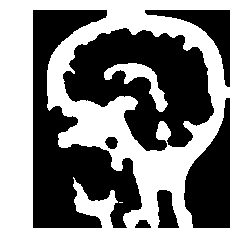

In [5]:
# Apply a closing operation - we're using a large kernel here. By all means adjust the size of this kernel
# and observe the effects

closingKernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (33,33))
close = cv2.morphologyEx(otsu, cv2.MORPH_CLOSE, closingKernel)
plt.imshow(close, cmap='gray')
plt.axis("off")

# Erosion Operation

(-0.5, 649.5, 719.5, -0.5)

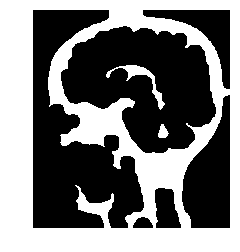

In [6]:
# Erode smaller artefacts out of the image - play with iterations to see how it works
#Erosion Operations

eroded = cv2.erode(close, None, iterations=6) 
plt.imshow(eroded, cmap='gray')
plt.savefig("erosion.jpg")
plt.axis("off")

In [7]:
p = int(img.shape[1] * 0.05)
eroded[:, 0:p] = 0
eroded[:, img.shape[1] - p:] = 0


(-0.5, 649.5, 719.5, -0.5)

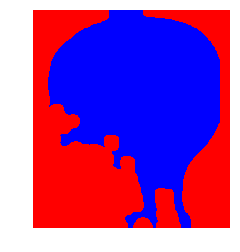

In [8]:
# keep post-processing simple
# Find Contours on Erosion Image

(cnting, contours, _) = cv2.findContours(eroded.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


# Sort the candidates by size, and just keep the largest one
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:1]

# Lets create two images, initially all zeros (i.e. black)
h, w, num_c = img.shape
segmask = np.zeros((h, w, num_c), np.uint8)
stencil = np.zeros((h, w, num_c), np.uint8)

# I know we've only one contour, but - in general - we'd expect to have more contours to deal with
for c in contours:
    # Fill in the starfish shape into segmask
    cv2.drawContours(segmask, [c], 0, (255,0,0), -1)
    # and then re-arrange the colors using numpy
    cv2.drawContours(stencil, [c], 0, (255, 0, 0), -1)
    stencil[np.where((stencil==[0,0,0]).all(axis=2))] = [0,0, 255]
    stencil[np.where((stencil==[255,0,0]).all(axis=2))] = [0, 0, 0]

# Now, lets create a mask image by bitwise ORring segmask and stencil together
mask = cv2.bitwise_or(stencil, segmask)

plt.imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))
plt.axis("off")


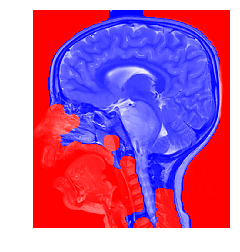

In [9]:
# Now, lets just blend our original image with our mask

output = cv2.bitwise_or(mask, img)

plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.savefig("segment.jpg")

# Conclusion

  
To summarise , we''ve learned some basic image processing techniques, such as morphological operations like erosion and dilation, contour detection and we've used these techniques in combination with Otsu's thresholding method to segment an image.



    
**Credit:  Motivation from Microsoft ComputerVision Course**